# ***CASE BASE 2 PEMBELAJARAN MESIN***
Najib Jamil Abdurrahman

1301204250

###Import tools yang digunakan

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import sqrt
import random

###Pembacaan data terlebih dahulu

In [270]:
from google.colab import files
uploadFile = files.upload()

Saving Country-data.csv to Country-data (2).csv


In [271]:
dataSet = '/content/Country-data.csv'
setdata = pd.read_csv(dataSet)

In [272]:
setdata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


###Pemilihan data yang digunakan

In [273]:
selection = setdata[['health', 'income']]
selection

,health,income
0,7.58,1610
1,6.55,9930
2,4.17,12900
3,2.85,5900
4,6.03,19100
...,...,...
162,5.25,2950
163,4.91,16500
164,6.84,4490
165,5.18,4480


###Mencari apakah ada nilai 0

In [274]:
selection.isna().sum()

health    0
income    0
dtype: int64

###Melihat deskripsi data dari min,max, dan total

In [275]:
selection.describe()

,health,income
count,167.000000,167.000000
mean,6.815689,17144.688623
std,2.746837,19278.067698
min,1.810000,609.000000
25%,4.920000,3355.000000
50%,6.320000,9960.000000
75%,8.600000,22800.000000
max,17.900000,125000.000000


###Normalisasi data

In [276]:
def norm(selection):
  return(selection - selection.min())/(selection.max() - selection.min())

selection = norm(selection)
selection.head()

,health,income
0,0.358608,0.008047
1,0.294593,0.074933
2,0.146675,0.098809
3,0.064636,0.042535
4,0.262275,0.148652


In [277]:
arr = pd.DataFrame(selection)
arr = arr.apply(pd.to_numeric)
arr = arr.to_numpy()
arr

array([[3.58607831e-01, 8.04720599e-03],
       [2.94592915e-01, 7.49330739e-02],
       [1.46674953e-01, 9.88093994e-02],
       [6.46364201e-02, 4.25352316e-02],
       [2.62274705e-01, 1.48652234e-01],
       [3.90926041e-01, 1.45436567e-01],
       [1.60969546e-01, 4.89665651e-02],
       [4.30080796e-01, 3.27925654e-01],
       [5.71162213e-01, 3.42396154e-01],
       [2.52952144e-01, 1.23730817e-01],
       [3.77874456e-01, 1.79201068e-01],
       [1.96395277e-01, 3.25513904e-01],
       [1.06277191e-01, 1.47197144e-02],
       [3.82846489e-01, 1.18103400e-01],
       [2.36171535e-01, 1.25338650e-01],
       [5.52517091e-01, 3.25513904e-01],
       [2.10689869e-01, 5.84527820e-02],
       [1.42324425e-01, 9.73543102e-03],
       [2.10689869e-01, 4.67155984e-02],
       [1.88315724e-01, 3.85960399e-02],
       [5.77377253e-01, 7.32448489e-02],
       [4.03356122e-01, 1.02025066e-01],
       [4.47482909e-01, 1.11672066e-01],
       [6.40149161e-02, 6.43060993e-01],
       [3.144810

###Data Visualisasi
+ Scatterplot

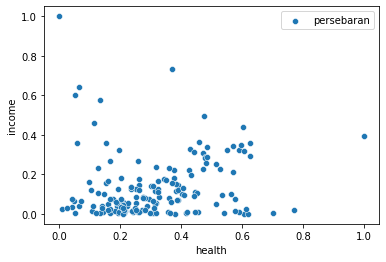

In [278]:
sns.scatterplot(data=selection, x='health', y='income', label='persebaran')
plt.show()

##Penerapan Algoritma Kmeans

###Inisiasi centeroid

In [279]:
centroids =[[]]

i = 0
for i in range(4):
  centroids[0].append(random.uniform(0,1))

###Membuat Clustering data

In [280]:
def cluster(iterasi):
  i = 0
  j = 0
  total = 0

  for i in range(167):
    while j < 2:
      total = total + abs(arr[i][j] - centroids[iterasi - 1][j])
      j = j+1
    temp_cent[i].append(total)
    temp_cent.append([])
    total = 0
    i = i + 1
    j = 1
  
  i = 0
  j = 0
  for i in range(167):
    while j < 2:
      total = total + abs(arr[i][j] - centroids[iterasi - 1][j+2])
      j = j+1
    temp_cent[i].append(total)
    total = 0
    i = i+1
    j = 1

  i = 0
  for i in range(167):
    if temp_cent[i][0] < temp_cent[i][1]:
      temp_cent[i].append(1)
    else:
      temp_cent[i].append(2)
    i = i + 1
    temp_cent

###Mengupdate posisi centeroid

In [281]:
def update_cent(iterasi):
  x1 , y1 = 0, 0
  x2 , y2 = 0, 0
  i = 0

  centroids.append([])

  for k in range(4):
    centroids[iterasi].append(0)

  for i in range(2):
    for j in range(167):
      if temp_cent[j][2] == 1:
        x1 = x1 + arr[j][i]
        y1 = y1 + 1
      else:
        x2 = x2 + arr[j][i]
        y2 = y2 + 1
    centroids[iterasi][i] = x1/y1
    centroids[iterasi][i+2] = x2/y2
    x1, y1 = 0, 0
    x2, y2 = 0, 0
    j = 0
    i = i+1

###Main program

In [282]:
for i in range(15):
  iterasi = i + 1
  temp_cent = [[]]
  cluster(iterasi)
  update_cent(iterasi)

hitung_iterasi = 0
for i in range(15):
  if centroids[i] != centroids[i + 1]:
    hitung_iterasi = hitung_iterasi + 1

print("centroid sama dari iterasi ke- ", hitung_iterasi) 

centroid sama dari iterasi ke-  11


###Melihat hasil centroid

In [283]:
temp_cent = temp_cent[0:167]
cluster = pd.DataFrame(temp_cent)
cluster

,0,1,2
0,0.130071,0.396742,1
1,0.010196,0.289507,1
2,0.034072,0.265631,1
3,0.022202,0.321905,1
4,0.083915,0.215788,1
...,...,...,...
162,0.045918,0.345621,1
163,0.063013,0.236690,1
164,0.033537,0.333240,1
165,0.033618,0.333321,1


###Melihat hasil Clustering

In [284]:
cluster.pop(0)
cluster.pop(1)
cluster

,2
0,1
1,1
2,1
3,1
4,1
...,...
162,1
163,1
164,1
165,1


###Memasukkan Hasil cluster ke data

In [285]:
selection['cluster'] = cluster

In [286]:
selection

,health,income,cluster
0,0.358608,0.008047,1
1,0.294593,0.074933,1
2,0.146675,0.098809,1
3,0.064636,0.042535,1
4,0.262275,0.148652,1
...,...,...,...
162,0.213797,0.018820,1
163,0.192666,0.127750,1
164,0.312617,0.031200,1
165,0.209447,0.031120,1


###Plot

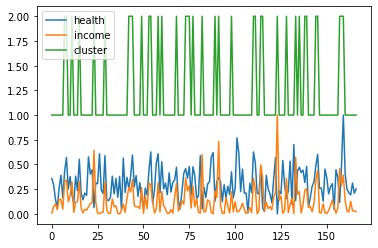

In [287]:
selection.plot()